In [2]:
using LinearAlgebra

In [29]:
include("operations.jl")

findmax (generic function with 8 methods)

In [35]:
# Function to compute log-posterior
function log_posterior(theta, Y, H, C_theta_theta, C_VV)
    log_likelihood = -0.5 * (Y - H * theta)' * inv(C_VV) * (Y - H * theta)
    log_prior = -0.5 * theta' * inv(C_theta_theta) * theta
    return log_likelihood + log_prior
end

# Gradient of log-posterior
function gradient_log_posterior(theta, Y, H, C_theta_theta, C_VV)
    gradient_likelihood = H' * inv(C_VV) * (Y - H * theta)
    gradient_prior = -inv(C_theta_theta) * theta
    return gradient_likelihood + gradient_prior
end


gradient_log_posterior (generic function with 1 method)

In [36]:
# Gradient Descent for MAP estimation
function map_estimator(Y, H, C_theta_theta, C_VV, alpha=0.01, max_iterations=1000, tolerance=1e-6)
    theta = zeros(m)
    trajectory = []
    
    for iteration in 1:max_iterations
        gradient = gradient_log_posterior(theta, Y, H, C_theta_theta, C_VV)
        theta -= alpha * gradient
        
        push!(trajectory, copy(theta))  # Save the current parameter vector
        
        if norm(gradient) < tolerance
            break
        end
    end
    
    return theta, trajectory
end

map_estimator (generic function with 4 methods)

In [37]:
# Define the Bayesian linear model parameters
n = 100  # Number of observations
m = 3    # Number of parameters

# Generate random data
H = randn(n, m)
C_theta_theta = randn(m, m)
C_VV = randn(n, n)
true_theta = randn(m)
Y = H * true_theta + randn(n);

In [38]:
# Run MAP estimator
estimated_theta_map, trajectory = map_estimator(Y, H, C_theta_theta, C_VV);

In [39]:
# Display the results
println("True Parameter Vector: ", true_theta)
println("MAP Estimator: ", estimated_theta_map)

True Parameter Vector: [-0.54915553580734, -0.34908641903201554, -1.2339908107137794]
MAP Estimator: [-1.1945530937214334e34, -3.847860429732897e35, -1.8454113092145536e35]


In [40]:
using Plots

┌ Warning: Skipped marker arg *.
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/args.jl:1149


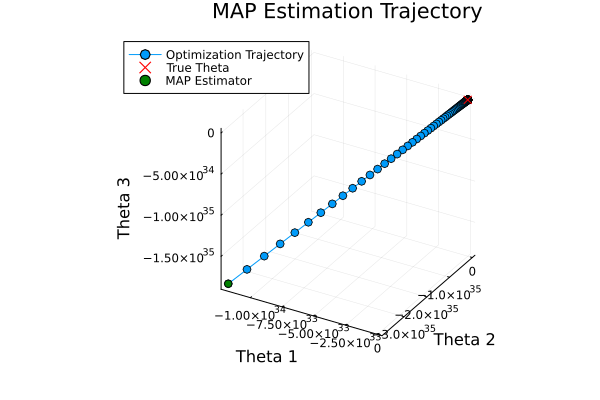

In [41]:
# Plot the optimization trajectory
plot(
    [theta[1] for theta in trajectory],
    [theta[2] for theta in trajectory],
    [theta[3] for theta in trajectory],
    marker = :o,
    label = "Optimization Trajectory",
    xlabel = "Theta 1",
    ylabel = "Theta 2",
    zlabel = "Theta 3",
    title = "MAP Estimation Trajectory"
)
scatter!([true_theta[1]], [true_theta[2]], [true_theta[3]], marker = :x, label = "True Theta", color = :red)
scatter!([estimated_theta_map[1]], [estimated_theta_map[2]], [estimated_theta_map[3]], marker = :*, label = "MAP Estimator", color = :green)
